In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 10  # Default font size
plt.rcParams['axes.titlesize'] = 10  # Title font size
plt.rcParams['axes.labelsize'] = 10  # Label font size
plt.rcParams['xtick.labelsize'] = 10  # x-axis tick label font size
plt.rcParams['ytick.labelsize'] = 10  # y-axis tick label font size
plt.rcParams['legend.fontsize'] = 10  # Legend font size
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [4]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [5]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_randomwalk_vs_cpd'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_randomwalk_vs_cpd
/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_randomwalk_vs_cpd made!
/mnt/home/szheng/ceph/place_variability/data/paper


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [6]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

In [7]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

# pf_params_all = prepped_data_agg['pf_params_all']
# all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [21]:
del frw

In [56]:
import fit_random_walk as frw
reload(frw)

<module 'fit_random_walk' from '/mnt/home/szheng/projects/place_variability/code/fit_random_walk.py'>

In [12]:
xx

1     2.726724
3     6.556670
6     2.604235
8     0.000000
10    1.067943
12    0.000000
14    0.000000
16    0.000000
18    0.000000
20    2.211157
23    3.462088
25    0.756490
27    0.000000
29    0.000000
31    1.453924
33    3.318139
35    6.774495
37    4.521126
39    6.736806
41    4.527848
43    4.535288
45    5.199083
47    4.890410
49    2.548487
51    2.443907
53    3.274828
55    4.392889
57    3.833263
59    4.230902
61    4.049848
63    4.542321
65    3.385491
68    4.288309
Name: (e13_26m1, e13_26m1_210913, 0, 0.0, 3, 0), dtype: float64

In [35]:
xx = X_raw_all.iloc[0].dropna().values
frw.fit_random_walk_get_ll(xx)

(3.0304302916177703, -63.145306980528055)

In [39]:
frw.fit_cpd_get_ll(xx,1,cost='l2',min_size=2)

(array([1.38928199, 1.38928199, 1.38928199, 1.38928199, 1.38928199,
        1.38928199, 1.38928199, 1.38928199, 1.38928199, 1.38928199,
        1.38928199, 1.38928199, 1.38928199, 1.38928199, 1.38928199,
        4.30519092, 4.30519092, 4.30519092, 4.30519092, 4.30519092,
        4.30519092, 4.30519092, 4.30519092, 4.30519092, 4.30519092,
        4.30519092, 4.30519092, 4.30519092, 4.30519092, 4.30519092,
        4.30519092, 4.30519092, 4.30519092]),
 -57.938233117795754)

0          1   2          3   4   5   \
e13_26m1 e13_26m1_210913 0 0.0 3  0 NaN   2.726724 NaN   6.556670 NaN NaN   
                               27 0 NaN  25.437013 NaN  21.112812 NaN NaN   
                               29 0 NaN   6.552950 NaN  11.096927 NaN NaN   
                                  1 NaN  25.426426 NaN  22.606144 NaN NaN   
                                  2 NaN   6.629354 NaN  31.612912 NaN NaN   
                               30 0 NaN  19.478041 NaN   3.109505 NaN NaN   
                                  1 NaN   6.839922 NaN   5.105462 NaN NaN   
                               31 0 NaN  10.493225 NaN  10.674181 NaN NaN   
                               32 1 NaN   5.797264 NaN   9.907441 NaN NaN   
                               33 0 NaN  20.088870 NaN  18.338904 NaN NaN   

                                            6   7          8   9   ...  60  \
e13_26m1 e13_26m1_210913 0 0.0 3  0   2.604235 NaN   0.000000 NaN  ... NaN   
                               27 0  35.841307 NaN  29.787902 NaN  ... NaN   
                               29 0  12.231089 NaN   9.724030 NaN  ... NaN   
                                  1  34.580452 NaN  33.254925 NaN  ... NaN   
                                  2  20.232920 NaN  11.154519 NaN  ... NaN   
                               30 0   9.231314 NaN  11.315227 NaN  ... NaN   
                                  1   9.421650 NaN   3.588356 NaN  ... NaN   
                               31 0  15.742619 NaN   6.719131 NaN  ... NaN   
                               32 1   9.664942 NaN   9.821828 NaN  ... NaN   
                               33 0  25.649386 NaN  18.098225 NaN  ... NaN   

                                            61  62         63  64         65  \
e13_26m1 e13_26m1_210913 0 0.0 3  0   4.049848 NaN   4.542321 NaN   3.385491   
                               27 0  39.647722 NaN  25.301658 NaN  32.204385   
                               29 0   0.460175 NaN   5.135708 NaN   0.290000   
                                  1  30.373815 NaN  22.062408 NaN  28.034777   
                                  2  14.687499 NaN  13.127737 NaN   7.586079   
                               30 0  13.366988 NaN  10.889579 NaN   2.863371   
                                  1   6.593764 NaN   2.826901 NaN   8.464436   
                               31 0   2.774201 NaN   4.637143 NaN   1.062146   
                               32 1  12.515540 NaN  10.700758 NaN   8.669258   
                               33 0  10.226009 NaN   6.234416 NaN   8.937084   

                                     66  67         68  69  
e13_26m1 e13_26m1_210913 0 0.0 3  0 NaN NaN   4.288309 NaN  
                               27 0 NaN NaN  33.144058 NaN  
                               29 0 NaN NaN   0.362910 NaN  
                                  1 NaN NaN  24.007206 NaN  
                                  2 NaN NaN  11.782125 NaN  
                               30 0 NaN NaN   7.859008 NaN  
                                  1 NaN NaN   3.035072 NaN  
                               31 0 NaN NaN   0.000000 NaN  
                               32 1 NaN NaN  15.110672 NaN  
                               33 0 NaN NaN   9.146904 NaN  

[10 rows x 70 columns]

In [59]:
%%time
ll_df_all = frw.fit_rw_cpd_get_ll_all(X_raw_all,common_var=False)


/mnt/home/szheng/projects/place_variability/code/fit_random_walk.py:31: RuntimeWarning: divide by zero encountered in log
  return xx_pwc,ll
/mnt/home/szheng/projects/place_variability/code/fit_random_walk.py:31: RuntimeWarning: invalid value encountered in divide
  return xx_pwc,ll


CPU times: user 1min 1s, sys: 0 ns, total: 1min 1s
Wall time: 1min 1s


/tmp/ipykernel_2532527/3468009796.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
/tmp/ipykernel_2532527/3468009796.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)


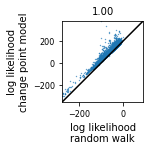

In [77]:
dosave = True#False
fig,ax=plt.subplots(figsize=(1.5,1.5))
ax.set_aspect('equal')
ax.scatter(ll_df_all.loc[:,'rw'],ll_df_all.loc[:,'step'],s=0.1,marker='o')
frac_step_larger=(ll_df_all.loc[:,'step_minus_rd'].dropna() > 0).mean()

ll_min = ll_df_all[['rw','step']].min().min()
ll_max = ll_df_all[['rw','step']].max().max()

ax.plot([ll_min,ll_max],[ll_min,ll_max],c='k')
ax.set_xlim([ll_min,ll_max])
ax.set_ylim([ll_min,ll_max])

#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac_step_larger:.2f}')
# to use the png version, get rid of as much text as possible
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
ax.set_xlabel('log likelihood\nrandom walk')
ax.set_ylabel('log likelihood\nchange point model')
if dosave:
    figfn = f'scatter_ll_cpd_vs_rd'
    ph.save_given_name(fig,figfn,figdir,dpi=900)


In [ ]:
fit_random_walk_get_ll